### Factor Selection ###

Why is there a need for factor selection?
> Adding more and more factors into your regression may make the training model's performance seem better and better. In fact, you could potentially get perfect performance if you throw enough factors into a regression model. However, such an approach is a generally a bad idea. Aside from the issues relating to collecting more data and making sure the sample size is adequate, the more important issue is with regards to to overfitting. 

Overfitting happens when a model fits so well to the development or training data, that it will perform very badly once we give it any data (from the real world) that is different from the training set.

** Overfitting Example **

Let's use data from Kaggle to see what the consequence of overfitting is. The dataset is a survey of young people on a broad range of interests and preferences, obtained from https://www.kaggle.com/miroslavsabo/young-people-survey/version/2

In [26]:
import pandas as pd
young_responses = pd.read_csv('young-people-survey/responses.csv')

In [27]:
young_responses.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


Let's try to see if we can predict the respondent's happiness in life ('Happiness in life') based on some other answers -
- Whether he/she enjoys music ('Music')
- Whether he/she likes to watch movies ('Movies')
- Whether he/she likes socialising ('Fun with friends')
- Whether he/she fears some things ('Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats')
- How are he or she is ('Daily events')
- Whether he or she prefers money or friends ('Friends versus money')

There are a lot more dimensions than this, but let's keep to these for now.

In [68]:
young_responses = young_responses.dropna()

In [69]:
independent_var = young_responses[['Music', 'Movies', 'Fun with friends',
                'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats',
               'Daily events', 'Friends versus money']]
dependent_var = young_responses[['Happiness in life']]

In [70]:
X = independent_var.values
y = dependent_var.values

Now we shall move from simple linear regression, to 2nd and 3rd order polynomial regression. In-sample results (measured by the mean of squared errors or differences between the predicted and actual happiness) will improve more and more since our model is fitted closer and closer to each of the data points. But you will see out-of-sample drop. 

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

lm = LinearRegression()
lm.fit(X_train,y_train)

print ('Train (cases, features) = %s' % str(X_train.shape))
print ('Test  (cases, features) = %s' % str(X_test.shape))
print ('In-sample  mean squared error %0.3f' % mean_squared_error(y_train,lm.predict(X_train)))
print ('Out-sample mean squared error %0.3f' % mean_squared_error(y_test,lm.predict(X_test)))

Train (cases, features) = (471, 12)
Test  (cases, features) = (203, 12)
In-sample  mean squared error 0.617
Out-sample mean squared error 0.631


In [72]:
from sklearn.preprocessing import PolynomialFeatures
second_order=PolynomialFeatures(degree=2, interaction_only=False)
third_order=PolynomialFeatures(degree=3, interaction_only=True)

Fitting closer with a 2nd order polynomial

In [73]:
lm.fit(second_order.fit_transform(X_train),y_train)
print ('(cases, features) = %s' % str(second_order.fit_transform(X_train).shape))
print ('In-sample  mean squared error %0.3f' % mean_squared_error(y_train,lm.predict(second_order.fit_transform(X_train))))
print ('Out-sample mean squared error %0.3f' % mean_squared_error(y_test,lm.predict(second_order.fit_transform(X_test))))

(cases, features) = (471, 91)
In-sample  mean squared error 0.522
Out-sample mean squared error 0.724


Fitting even closer with a 3rd order polynomial

In [74]:
lm.fit(third_order.fit_transform(X_train), y_train)
print ('(cases, features) = %s' % str(third_order.fit_transform(X_train).shape))
print ('In-sample  mean squared error %0.3f' %
mean_squared_error(y_train,lm.predict(third_order.fit_transform(X_train))))
print ('Out-sample mean squared error %0.3f' %
mean_squared_error(y_test,lm.predict(third_order.fit_transform(X_test))))


(cases, features) = (471, 299)
In-sample  mean squared error 0.217
Out-sample mean squared error 20.591


<hr>

** Checking the Correlations in a Dataset **

The obvious way to solve the issue of overfitting is to start getting rid of extraneous variables. One quick way of doing this is to eliminate factors that are correlated with each other. We can simply examine a correlation matrix to do this.

In [75]:
print ('Training set: %i observations %i features' % (X_train.shape))
print ('Validation set: %i observations %i features' % (X_test.shape))

Training set: 471 observations 12 features
Validation set: 203 observations 12 features


In [76]:
from scipy.stats import describe
print(describe(X_train))

DescribeResult(nobs=471, minmax=(array([ 2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.])), mean=array([ 4.78768577,  4.62845011,  4.56900212,  1.96178344,  1.94692144,
        2.28025478,  2.57749469,  2.79193206,  3.        ,  2.38428875,
        3.0955414 ,  3.77707006]), variance=array([ 0.29525229,  0.45527398,  0.49682432,  1.27087681,  1.3482405 ,
        1.61065185,  1.72962009,  2.4629986 ,  2.25106383,  1.95200795,
        1.24829923,  1.25870714]), skewness=array([-2.96198154, -1.97141073, -1.61401196,  0.97599695,  1.09112067,
        0.72018659,  0.40161352,  0.23739422, -0.00756769,  0.55963674,
        0.1411506 , -0.64874969]), kurtosis=array([ 9.42609693,  4.22353256,  2.03602405,  0.08531691,  0.19819345,
       -0.54781455, -0.96147391, -1.48197486, -1.40358096, -0.99988482,
       -0.64169235, -0.32743757]))


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Reference http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor
# http://matplotlib.org/api/axes_api.html
def corr_matrix_plot(data, threshold=0):
    # returns pearson correlation coeff, rowvar means cols are the features
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<threshold)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False) # Set whether the axes rectangle patch is drawn
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='both', bottom='off',top='off', left = 'off',right = 'off')
    plt.colorbar()
    plt.show()

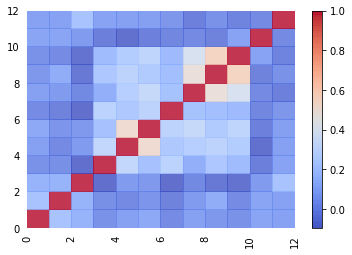

In [78]:
corr_matrix_plot(X_train, threshold=0.0)

*See the orangy dots outside of the diagonal? A heatmap allows us to see these spots where correlation is higher straightaway.*

** Univariate feature selection - Stepwise selection **

Other than eliminating variables with high correlation (and by tenuous inference - high collinearity), simplest way would be to use statistical tests.

Scikit-learn offers three possible tests:

* The f_regression class, which works out an F-test (a statistical test for comparing different regression solutions) and a p-value (interpretable as the probability value in which we observed a difference by chance) and reveals the best features for a regression
* The f_class, which is an Anova F-test (a statistical test for comparing differences among classes), another statistical and related method that will prove useful for classification problems
* The Chi2 class, which is a chi-squared test (a statistical test on count data), a good choice when your problem is classification and your answer variable is a count or a binary (in every case, a positive number such as units sold or money earned)


In [79]:
y_train = y_train.ravel()

In [80]:
# using the f_class test
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X_train, y_train)
variable_filter = selector.get_support()

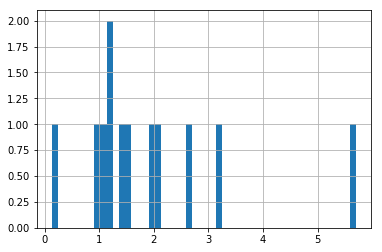

In [81]:
# plotting the scores
plt.hist(selector.scores_, bins=50, histtype='bar')
plt.grid()
plt.show()

In [83]:
# picking the top features
variable_filter = selector.scores_ > 5
print ("Number of filtered variables: %i" % np.sum(variable_filter))
from sklearn.preprocessing import PolynomialFeatures
interactions = PolynomialFeatures(degree=2, interaction_only=True)
Xs = interactions.fit_transform(X_train[:,variable_filter])
print ("Number of variables and interactions: %i" % Xs.shape[1])

Number of filtered variables: 1
Number of variables and interactions: 2
